<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Capstone Project - Predicting COVID-19 Mortality & Severity  - Notebook 3  (Modelling to Predict 'Severity')

This notebook outlines the feature selection and modelling for prediction of COVID-19 illness severity.

In [9]:
# Import Libraries
import pandas as pd
import numpy as np
from textwrap import wrap

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style(style='white')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.cluster import KMeans

import xgboost
import itertools
import mlxtend
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Printing library versions
print('The NumPy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The mlxtend version is {}.'.format(mlxtend.__version__))
print('The xgboost version is {}.'.format(xgboost.__version__))
print('The seaborn version is {}.'.format(sns.__version__))
!pip show matplotlib

The NumPy version is 1.21.5.
The pandas version is 1.4.2.
The scikit-learn version is 1.1.1.
The mlxtend version is 0.20.0.
The xgboost version is 1.5.1.
The seaborn version is 0.11.2.
Name: matplotlib
Version: 3.5.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Users/gaylecferguson/opt/anaconda3/lib/python3.9/site-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: mlxtend, seaborn, sweetviz, wordcloud


In [11]:
# Imported cleaned data (saved from Notebook 2)
mortality = pd.read_csv(r'/Users/gaylecferguson/Data/Capstone_Project/mortality_clean_2.csv',header=0)
print(mortality.shape)
mortality.head()

(4711, 76)


,Unnamed: 0,LOS,Death,Severity,Black,White,Asian,Latino,MI,PVD,...,AST_over50,ALT_over100,ALT_over50,WBCunder4.3_over10.8,Lympho_under1,Lympho_over2,IL6_over60,Ferritin_over1000,CrctProtein_over20,Procalcitonin_over2
0,0,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,1,3,0,1,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0
2,2,2,1,3,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
3,3,15,0,2,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
4,4,9,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
# Dropped 'Unnamed: 0' column generated by the csv file
mortality.drop(['Unnamed: 0'], axis=1, inplace=True)
print(mortality.shape)
mortality.columns

(4711, 75)


Index(['LOS', 'Death', 'Severity', 'Black', 'White', 'Asian', 'Latino', 'MI',
       'PVD', 'CHF', 'CVD', 'DEMENT', 'COPD', 'DMcompl', 'DMsimple',
       'RenalDis', 'AllCNS', 'PureCNS', 'Stroke', 'Seizure', 'OldSyncope',
       'OldOtherNeuro', 'OtherBrnLsn', 'Age', 'AgeScore', 'O2Sat', 'Temp',
       'Temp_over38', 'MAP', 'MAP_under70', 'DDimer', 'DDimer_over3',
       'PltsScore', 'INR', 'BUN', 'Creatinine', 'CrtnScore', 'Sodium',
       'Glucose', 'AST', 'ALT', 'WBC', 'Lympho', 'IL6', 'Ferritin',
       'CrctProtein', 'CrctProtein_over10', 'Procalcitonin',
       'Procalcitonin_over0.1', 'Troponin', 'Troponin_over0.1',
       'PVDcompressed', 'BUN_over30', 'BUN_over100', 'O2Sat_under94',
       'O2Sat_under90', 'Temp_isorunder36', 'Temp_over39', 'DDimer_over17',
       'INR_over1.2', 'Sodium_betw130and145', 'Sodium_over155',
       'Glucose_under60_over140', 'Glucose_over200', 'AST_over100',
       'AST_over50', 'ALT_over100', 'ALT_over50', 'WBCunder4.3_over10.8',
       'Lympho_un

In [13]:
# Checking target data
mortality[['Severity']].value_counts()

Severity
2           2200
1           1656
3            855
dtype: int64

Created one more feature: WBC to Lymphocyte Ratio. 
This feature was created because Shang et at (2020) report that neutrophil‐to‐lymphocyte ratio (along with C-reactive protein and platelet counts) was the leading predictor of covid illness severity. Neutrophil count is not a feature of this dataset, but have used WBC counts instead, as Neutrophils make up around 70% of White Blood Cells. 

In [16]:
# Created an additional feature: WBC to Lymphocyte Ratio

mortality['WBCLympho_ratio'] = mortality['WBC'] / mortality['Lympho']

# 'WBCLympho_ratio' has a correlation coefficient of 0.233 for correlation with severity 
  # and a correlation coefficient of 0.157 for correlation with death

mortality.corrwith(mortality.Severity, axis=0, method='pearson')
mortality.corrwith(mortality.Death, axis=0, method='pearson')

LOS                    0.135061
Death                  1.000000
Severity               0.360873
Black                 -0.017147
White                  0.033857
                         ...   
IL6_over60             0.176918
Ferritin_over1000      0.106000
CrctProtein_over20     0.177679
Procalcitonin_over2    0.211109
WBCLympho_ratio        0.157108
Length: 76, dtype: float64

In [17]:
# Prepare the data
  # The 'Target' is 'Severity'
    # Also dropped 'Death', as we want to predict 'Severity' from patient medical history and blood test results
      # in order to prevent death!
X = mortality.drop(['Severity','Death'], axis=1)
y = mortality['Severity']

## 3.1. Test/Train/Validation Split

In [494]:
# Partion the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (2826, 74)
y_train:  (2826,)
X_val:  (942, 74)
y_val:  (942,)
X_test:  (943, 74)
y_test:  (943,)


In [495]:
# Scale the X data
  # Only want to scale the float data, not the catagorical data
     # LOS has many integer values so will treat is as a float (as with age) and scale it. 

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train[['LOS','Age','O2Sat','Temp','MAP','DDimer','INR', 'BUN', 'Creatinine', 'Sodium', 'Glucose', 'AST', 
        'ALT', 'WBC', 'Lympho', 'IL6', 'Ferritin', 'CrctProtein','Procalcitonin',
        'Troponin','WBCLympho_ratio']] = scaler.fit_transform(X_train[['LOS','Age','O2Sat','Temp','MAP','DDimer','INR', 'BUN', 
                                                     'Creatinine', 'Sodium', 'Glucose', 'AST', 'ALT', 'WBC', 
                                                     'Lympho', 'IL6', 'Ferritin', 'CrctProtein','Procalcitonin',
                                                     'Troponin','WBCLympho_ratio']])

X_val[['LOS','Age','O2Sat','Temp','MAP','DDimer','INR', 'BUN', 'Creatinine', 'Sodium', 'Glucose', 'AST', 
        'ALT', 'WBC', 'Lympho', 'IL6', 'Ferritin', 'CrctProtein','Procalcitonin',
        'Troponin','WBCLympho_ratio']] = scaler.transform(X_val[['LOS','Age','O2Sat','Temp','MAP','DDimer','INR', 'BUN', 
                                                   'Creatinine', 'Sodium', 'Glucose', 'AST', 'ALT', 'WBC', 'Lympho', 
                                                   'IL6', 'Ferritin', 'CrctProtein','Procalcitonin','Troponin','WBCLympho_ratio']])

X_test[['LOS','Age','O2Sat','Temp','MAP','DDimer','INR', 'BUN', 'Creatinine', 'Sodium', 'Glucose', 'AST', 
        'ALT', 'WBC', 'Lympho', 'IL6', 'Ferritin', 'CrctProtein','Procalcitonin',
        'Troponin','WBCLympho_ratio']] = scaler.transform(X_test[['LOS','Age','O2Sat','Temp','MAP','DDimer','INR', 'BUN', 
                                                   'Creatinine', 'Sodium', 'Glucose', 'AST', 'ALT', 'WBC', 'Lympho', 
                                                   'IL6', 'Ferritin', 'CrctProtein','Procalcitonin','Troponin','WBCLympho_ratio']])

## 3.2. Dimension Reduction - Principal Component Analysis

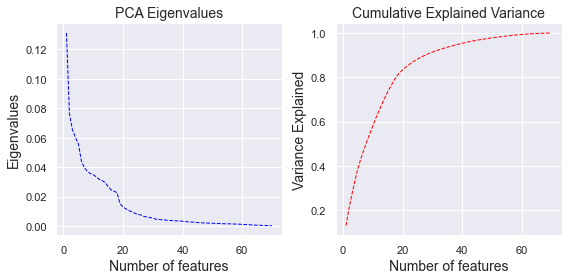

In [496]:
# Plot scree plot

pca = PCA(n_components=70, copy=True, whiten=True)

X_train_pca = pca.fit_transform(X_train)

PC_values = np.arange(pca.n_components_) + 1
expvar = pca.explained_variance_ratio_
cumexpvar = pca.explained_variance_ratio_.cumsum()
sns.set_style(style='darkgrid')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
ax1.plot(PC_values, expvar, '--', linewidth=1, color='blue')
ax2.plot(PC_values, cumexpvar, '--', linewidth=1, color='red')
#plt.hist(expvar, bins=70, color='blue')
ax1.set_title('PCA Eigenvalues',fontsize=14)
ax1.set_xlabel('Number of features', fontsize=14)
ax1.set_ylabel('Eigenvalues', fontsize=14)
ax2.set_title('Cumulative Explained Variance',fontsize=14)
ax2.set_xlabel('Number of features', fontsize=14)
ax2.set_ylabel('Variance Explained', fontsize=14)

plt.tight_layout()
plt.show()

Seventy principal components explain 99.9%% of the variance in the dataset. The decomposition rate of the curves show that in the case of this dataset, although the first 10 principal components explain the majority of the variation, a large dimension reduction will still sacrifice a lot of the explained variance. 

60 principal components explains ~ 98% of the variance

50 principal components explains ~ 94% of the variance

In [497]:
pca = PCA(n_components=60, copy=True, whiten=True)

In [498]:
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [499]:
pca.explained_variance_ratio_

array([0.13, 0.08, 0.07, 0.06, 0.06, 0.04, 0.04, 0.04, 0.04, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ])

In [500]:
pca.explained_variance_ratio_.cumsum()

array([0.13, 0.21, 0.27, 0.33, 0.39, 0.43, 0.47, 0.51, 0.55, 0.58, 0.61,
       0.65, 0.68, 0.71, 0.73, 0.76, 0.78, 0.8 , 0.82, 0.83, 0.84, 0.86,
       0.87, 0.87, 0.88, 0.89, 0.9 , 0.9 , 0.91, 0.91, 0.92, 0.92, 0.93,
       0.93, 0.94, 0.94, 0.94, 0.95, 0.95, 0.95, 0.96, 0.96, 0.96, 0.96,
       0.97, 0.97, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.99,
       0.99, 0.99, 0.99, 0.99, 0.99])

## 3.2. Feature Selection - Recursive feature elimination

In [501]:
%%time
# Will use logistic regression as the estimator for recursive feature selection to find the best short-list of 
  # features for predicting 'severity'

lr_params = {'penalty':['l2'], 'C':[1,10,100], 'solver':['liblinear','lbfgs']}

logreg = LogisticRegression(tol=0.0001, random_state=1, max_iter=10000)

gs = GridSearchCV(estimator=logreg, param_grid=lr_params)

gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.9246305387910818
CPU times: user 32.6 s, sys: 7.26 s, total: 39.8 s
Wall time: 5.99 s


In [511]:
%%time
logreg = LogisticRegression(penalty='l2', tol=0.0001, C=10, random_state=1, solver='lbfgs', max_iter=10000)
rfe = RFE(estimator=logreg,n_features_to_select=40)
rfe.fit_transform(X_train, y_train)

CPU times: user 47.1 s, sys: 9.68 s, total: 56.8 s
Wall time: 8.18 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.]])

In [503]:
# Print Score
print("Score: ", rfe.score(X_train, y_train))

# Find Top 10 Features
print("Top 10 features: ", rfe.get_feature_names_out())

Score:  0.9575371549893843
Top 10 features:  ['AgeScore' 'MAP_under70' 'DDimer_over3' 'PltsScore' 'CrtnScore'
 'CrctProtein_over10' 'O2Sat_under94' 'Temp_isorunder36' 'INR_over1.2'
 'AST_over50']


'WBCLympho_ratio' is not selected within the top 10 features.

In [506]:
# Print Score
print("Score: ", rfe.score(X_train, y_train))

# Find Top 15 Features
print("Top 15 features: ", rfe.get_feature_names_out())

Score:  0.9571832979476291
Top 15 features:  ['Stroke' 'OldSyncope' 'OldOtherNeuro' 'Age' 'AgeScore' 'MAP_under70'
 'DDimer_over3' 'PltsScore' 'Creatinine' 'CrtnScore' 'CrctProtein_over10'
 'O2Sat_under94' 'Temp_isorunder36' 'INR_over1.2' 'AST_over50']


In [508]:
# Print Score
print("Score: ", rfe.score(X_train, y_train))

# Find Top 20 Features
print("Top 20 features: ", rfe.get_feature_names_out())

Score:  0.9571832979476291
Top 20 features:  ['MI' 'PVD' 'Stroke' 'OldSyncope' 'OldOtherNeuro' 'OtherBrnLsn' 'Age'
 'AgeScore' 'MAP_under70' 'DDimer_over3' 'PltsScore' 'Creatinine'
 'CrtnScore' 'Lympho' 'CrctProtein_over10' 'PVDcompressed' 'O2Sat_under94'
 'Temp_isorunder36' 'INR_over1.2' 'AST_over50']


In [510]:
# Print Score
print("Score: ", rfe.score(X_train, y_train))

# Find Top 30 Features
print("Top 30 features: ", rfe.get_feature_names_out())

Score:  0.9607218683651805
Top 30 features:  ['MI' 'PVD' 'DEMENT' 'COPD' 'DMcompl' 'DMsimple' 'PureCNS' 'Stroke'
 'Seizure' 'OldSyncope' 'OldOtherNeuro' 'OtherBrnLsn' 'Age' 'AgeScore'
 'MAP' 'MAP_under70' 'DDimer_over3' 'PltsScore' 'Creatinine' 'CrtnScore'
 'Lympho' 'CrctProtein_over10' 'PVDcompressed' 'BUN_over30'
 'O2Sat_under94' 'Temp_isorunder36' 'INR_over1.2' 'Sodium_over155'
 'AST_over50' 'Lympho_over2']


In [512]:
# Print Score
print("Score: ", rfe.score(X_train, y_train))

# Find Top 40 Features
print("Top 40 features: ", rfe.get_feature_names_out())

Score:  0.9631988676574664
Top 40 features:  ['MI' 'PVD' 'CHF' 'DEMENT' 'COPD' 'DMcompl' 'DMsimple' 'PureCNS' 'Stroke'
 'Seizure' 'OldSyncope' 'OldOtherNeuro' 'OtherBrnLsn' 'Age' 'AgeScore'
 'MAP' 'MAP_under70' 'DDimer' 'DDimer_over3' 'PltsScore' 'Creatinine'
 'CrtnScore' 'Lympho' 'IL6' 'CrctProtein_over10' 'PVDcompressed'
 'BUN_over30' 'O2Sat_under94' 'O2Sat_under90' 'Temp_isorunder36'
 'Temp_over39' 'DDimer_over17' 'INR_over1.2' 'Sodium_over155'
 'AST_over100' 'AST_over50' 'ALT_over50' 'Lympho_over2' 'IL6_over60'
 'CrctProtein_over20']


In [35]:
# Print Score
print("Score: ", rfe.score(X_train, y_train))

# Find Top 50 Features
print("Top 50 features: ", rfe.get_feature_names_out())

Score:  0.962137296532201
Top 50 features:  ['Black' 'White' 'Asian' 'MI' 'PVD' 'CHF' 'CVD' 'DEMENT' 'COPD' 'DMcompl'
 'DMsimple' 'RenalDis' 'PureCNS' 'Stroke' 'Seizure' 'OldSyncope'
 'OldOtherNeuro' 'OtherBrnLsn' 'Age' 'AgeScore' 'MAP' 'MAP_under70'
 'DDimer' 'DDimer_over3' 'PltsScore' 'Creatinine' 'CrtnScore' 'Lympho'
 'IL6' 'CrctProtein_over10' 'Procalcitonin_over0.1' 'Troponin_over0.1'
 'PVDcompressed' 'BUN_over30' 'BUN_over100' 'O2Sat_under94'
 'O2Sat_under90' 'Temp_isorunder36' 'Temp_over39' 'DDimer_over17'
 'INR_over1.2' 'Sodium_over155' 'Glucose_under60_over140' 'AST_over100'
 'AST_over50' 'ALT_over50' 'WBCunder4.3_over10.8' 'Lympho_over2'
 'IL6_over60' 'CrctProtein_over20']


In [33]:
# Print Score
print("Score: ", rfe.score(X_train, y_train))

# Find Top 60 Features
print("Top 60 features: ", rfe.get_feature_names_out())

Score:  0.9624911535739561
Top 60 features:  ['Black' 'White' 'Asian' 'Latino' 'MI' 'PVD' 'CHF' 'CVD' 'DEMENT' 'COPD'
 'DMcompl' 'DMsimple' 'RenalDis' 'AllCNS' 'PureCNS' 'Stroke' 'Seizure'
 'OldSyncope' 'OldOtherNeuro' 'OtherBrnLsn' 'Age' 'AgeScore' 'O2Sat'
 'Temp' 'Temp_over38' 'MAP' 'MAP_under70' 'DDimer' 'DDimer_over3'
 'PltsScore' 'Creatinine' 'CrtnScore' 'ALT' 'Lympho' 'IL6'
 'CrctProtein_over10' 'Procalcitonin_over0.1' 'Troponin'
 'Troponin_over0.1' 'PVDcompressed' 'BUN_over30' 'BUN_over100'
 'O2Sat_under94' 'O2Sat_under90' 'Temp_isorunder36' 'Temp_over39'
 'DDimer_over17' 'INR_over1.2' 'Sodium_over155' 'Glucose_under60_over140'
 'Glucose_over200' 'AST_over100' 'AST_over50' 'ALT_over100' 'ALT_over50'
 'WBCunder4.3_over10.8' 'Lympho_over2' 'IL6_over60' 'CrctProtein_over20'
 'Procalcitonin_over2']


In [31]:
# Print Score
print("Score: ", rfe.score(X_train, y_train))

# Find Top 70 Features
print("Top 70 features: ", rfe.get_feature_names_out())

Score:  0.9663835810332626
Top 70 features:  ['Black' 'White' 'Asian' 'Latino' 'MI' 'PVD' 'CHF' 'CVD' 'DEMENT' 'COPD'
 'DMcompl' 'DMsimple' 'RenalDis' 'AllCNS' 'PureCNS' 'Stroke' 'Seizure'
 'OldSyncope' 'OldOtherNeuro' 'OtherBrnLsn' 'Age' 'AgeScore' 'O2Sat'
 'Temp' 'Temp_over38' 'MAP' 'MAP_under70' 'DDimer' 'DDimer_over3'
 'PltsScore' 'INR' 'BUN' 'Creatinine' 'CrtnScore' 'Sodium' 'AST' 'ALT'
 'Lympho' 'IL6' 'Ferritin' 'CrctProtein' 'CrctProtein_over10'
 'Procalcitonin' 'Procalcitonin_over0.1' 'Troponin' 'Troponin_over0.1'
 'PVDcompressed' 'BUN_over30' 'BUN_over100' 'O2Sat_under94'
 'O2Sat_under90' 'Temp_isorunder36' 'Temp_over39' 'DDimer_over17'
 'INR_over1.2' 'Sodium_betw130and145' 'Sodium_over155'
 'Glucose_under60_over140' 'Glucose_over200' 'AST_over100' 'AST_over50'
 'ALT_over100' 'ALT_over50' 'WBCunder4.3_over10.8' 'Lympho_under1'
 'Lympho_over2' 'IL6_over60' 'Ferritin_over1000' 'CrctProtein_over20'
 'Procalcitonin_over2']


In [29]:
# Print Score
print("Score: ", rfe.score(X_train, y_train))

# Find Top 74 Features
print("Top 74 features: ", rfe.get_feature_names_out())

Score:  0.9656758669497523
Top 74 features:  ['LOS' 'Black' 'White' 'Asian' 'Latino' 'MI' 'PVD' 'CHF' 'CVD' 'DEMENT'
 'COPD' 'DMcompl' 'DMsimple' 'RenalDis' 'AllCNS' 'PureCNS' 'Stroke'
 'Seizure' 'OldSyncope' 'OldOtherNeuro' 'OtherBrnLsn' 'Age' 'AgeScore'
 'O2Sat' 'Temp' 'Temp_over38' 'MAP' 'MAP_under70' 'DDimer' 'DDimer_over3'
 'PltsScore' 'INR' 'BUN' 'Creatinine' 'CrtnScore' 'Sodium' 'Glucose' 'AST'
 'ALT' 'WBC' 'Lympho' 'IL6' 'Ferritin' 'CrctProtein' 'CrctProtein_over10'
 'Procalcitonin' 'Procalcitonin_over0.1' 'Troponin' 'Troponin_over0.1'
 'PVDcompressed' 'BUN_over30' 'BUN_over100' 'O2Sat_under94'
 'O2Sat_under90' 'Temp_isorunder36' 'Temp_over39' 'DDimer_over17'
 'INR_over1.2' 'Sodium_betw130and145' 'Sodium_over155'
 'Glucose_under60_over140' 'Glucose_over200' 'AST_over100' 'AST_over50'
 'ALT_over100' 'ALT_over50' 'WBCunder4.3_over10.8' 'Lympho_under1'
 'Lympho_over2' 'IL6_over60' 'Ferritin_over1000' 'CrctProtein_over20'
 'Procalcitonin_over2']


In [73]:
# Creating dataframe of top features

index=['Accuracy Score (LogReg)','Features']
columns=['Top Feature','Top 2 Features','Top 3 Features','Top 4 Features','Top 5 Features','Top 6 Features',
       'Top 7 Features', 'Top 8 Features','Top 9 Features','Top 10 Features','Top 15 Features','Top 20 Features',
       'Top 30 Features', 'Top 40 Features','Top 50 Features','Top 60 Features','Top 70 Features','All Features']
scores=[0.4544,0.4579,0.5683,0.5938,0.6274,0.7597,0.7923,0.8040,0.9540,0.9575,0.9572,0.9572,0.9607,0.9632,0.9621,0.9625,0.9664,0.9657]
features=['MAP<70','MAP<70, INR>1.2','MAP<70, INR>1.2, CrctProtein>10','MAP<70, INR>1.2, CrctProtein>10, DDimer>3',
          'MAP<70, INR>1.2, CrctProtein>10, DDimer>3, PltsScore',
          'MAP<70, INR>1.2, CrctProtein>10, DDimer>3, PltsScore, AgeScore',
          'MAP<70, INR>1.2, CrctProtein>10, DDimer>3, PltsScore, AgeScore, O2Sat<94',
          'MAP<70, INR>1.2, CrctProtein>10, DDimer>3, PltsScore, AgeScore, O2Sat<94, AST_over50',
          'MAP<70, INR>1.2, CrctProtein>10, DDimer>3, PltsScore, AgeScore, O2Sat<94, AST_over50, CrtnScore',
          'MAP<70, INR>1.2, CrctProtein>10, DDimer>3, PltsScore, AgeScore, O2Sat<94, AST_over50, CrtnScore, Temp<=36', 
          'As above + Stroke, OldSyncope, OldOtherNeuro, Age, Creatinine',
          'As above + MI, PVD, OtherBrnLsn, Lympho, PVDcompressed',
          'ND','ND','ND','ND','ND','ND']
data=np.array([scores,features])
df=pd.DataFrame(data,index=index, columns=columns)  
df = df.transpose() 
df['Accuracy Score (LogReg)'] =  df['Accuracy Score (LogReg)'].astype(np.float16)
df       

,Accuracy Score (LogReg),Features
Top Feature,0.454346,MAP<70
Top 2 Features,0.458008,"MAP<70, INR>1.2"
Top 3 Features,0.568359,"MAP<70, INR>1.2, CrctProtein>10"
Top 4 Features,0.593750,"MAP<70, INR>1.2, CrctProtein>10, DDimer>3"
Top 5 Features,0.627441,"MAP<70, INR>1.2, CrctProtein>10, DDimer>3, Plt..."
Top 6 Features,0.759766,"MAP<70, INR>1.2, CrctProtein>10, DDimer>3, Plt..."
Top 7 Features,0.792480,"MAP<70, INR>1.2, CrctProtein>10, DDimer>3, Plt..."
Top 8 Features,0.804199,"MAP<70, INR>1.2, CrctProtein>10, DDimer>3, Plt..."
Top 9 Features,0.954102,"MAP<70, INR>1.2, CrctProtein>10, DDimer>3, Plt..."
Top 10 Features,0.957520,"MAP<70, INR>1.2, CrctProtein>10, DDimer>3, Plt..."


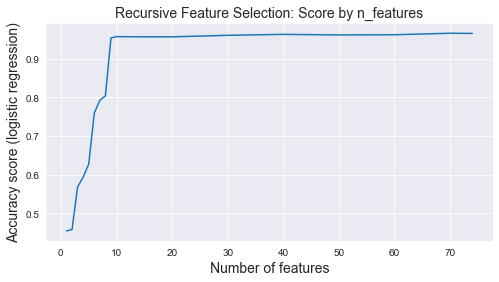

In [74]:
# Plot to see how accuracy score improves as more features are added
  # Accuracy score doesn't improve much beyond the top 10 features

fig, ax = plt.subplots(figsize=(8,4))
x=[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,74]
y=df['Accuracy Score (LogReg)'].tolist()
sns.set_style("darkgrid")
sns.lineplot(x,y)
ax.set_title("Recursive Feature Selection: Score by n_features", fontsize=14)
ax.set_xlabel("Number of features", fontsize=14)
ax.set_ylabel("Accuracy score (logistic regression)", fontsize=14)
plt.show()

In [75]:
# Created datasets with just the Top 10 features as determined by Recurssive Feature Elimination
X_train_top10rfe = X_train[['AgeScore','MAP_under70','DDimer_over3','PltsScore','CrtnScore',
                            'CrctProtein_over10','O2Sat_under94','Temp_isorunder36','INR_over1.2','AST_over50']]

X_val_top10rfe = X_val[['AgeScore','MAP_under70','DDimer_over3','PltsScore','CrtnScore',
                            'CrctProtein_over10','O2Sat_under94','Temp_isorunder36','INR_over1.2','AST_over50']]

X_test_top10rfe = X_test[['AgeScore','MAP_under70','DDimer_over3','PltsScore','CrtnScore',
                            'CrctProtein_over10','O2Sat_under94','Temp_isorunder36','INR_over1.2','AST_over50']]

In [76]:
# Created datasets with the Top 40 features as determined by Recurssive Feature Elimination
X_train_top40rfe = X_train[['MI','PVD','CHF','DEMENT','COPD','DMcompl','DMsimple','PureCNS','Stroke','Seizure',
                            'OldSyncope','OldOtherNeuro','OtherBrnLsn','Age','AgeScore','MAP','MAP_under70','DDimer',
                            'DDimer_over3','PltsScore','Creatinine','CrtnScore','Lympho','IL6','CrctProtein_over10',
                            'PVDcompressed','BUN_over30','O2Sat_under94','O2Sat_under90','Temp_isorunder36',
                            'Temp_over39','DDimer_over17','INR_over1.2','Sodium_over155','AST_over100','AST_over50',
                            'ALT_over50','Lympho_over2','IL6_over60','CrctProtein_over20']]

X_val_top40rfe = X_val[['MI','PVD','CHF','DEMENT','COPD','DMcompl','DMsimple','PureCNS','Stroke','Seizure',
                            'OldSyncope','OldOtherNeuro','OtherBrnLsn','Age','AgeScore','MAP','MAP_under70','DDimer',
                            'DDimer_over3','PltsScore','Creatinine','CrtnScore','Lympho','IL6','CrctProtein_over10',
                            'PVDcompressed','BUN_over30','O2Sat_under94','O2Sat_under90','Temp_isorunder36',
                            'Temp_over39','DDimer_over17','INR_over1.2','Sodium_over155','AST_over100','AST_over50',
                            'ALT_over50','Lympho_over2','IL6_over60','CrctProtein_over20']]

X_test_top40rfe = X_test[['MI','PVD','CHF','DEMENT','COPD','DMcompl','DMsimple','PureCNS','Stroke','Seizure',
                            'OldSyncope','OldOtherNeuro','OtherBrnLsn','Age','AgeScore','MAP','MAP_under70','DDimer',
                            'DDimer_over3','PltsScore','Creatinine','CrtnScore','Lympho','IL6','CrctProtein_over10',
                            'PVDcompressed','BUN_over30','O2Sat_under94','O2Sat_under90','Temp_isorunder36',
                            'Temp_over39','DDimer_over17','INR_over1.2','Sodium_over155','AST_over100','AST_over50',
                            'ALT_over50','Lympho_over2','IL6_over60','CrctProtein_over20']]

In [77]:
# Checking row and column numbers
print("X_train_top10rfe: ", X_train_top10rfe.shape)
print("y_train: ", y_train.shape)
print("X_val_top10rfe: ", X_val_top10rfe.shape)
print("y_val: ", y_val.shape)
print("X_test_top10rfe: ", X_test_top10rfe.shape)
print("y_test: ", y_test.shape)
print("X_train_top40rfe: ", X_train_top40rfe.shape)
print("X_val_top40rfe: ", X_val_top40rfe.shape)
print("X_test_top40rfe: ", X_test_top40rfe.shape)

X_train_top10rfe:  (2826, 10)
y_train:  (2826,)
X_val_top10rfe:  (942, 10)
y_val:  (942,)
X_test_top10rfe:  (943, 10)
y_test:  (943,)
X_train_top40rfe:  (2826, 40)
X_val_top40rfe:  (942, 40)
X_test_top40rfe:  (943, 40)


## 3.3. Feature Selection - Univariate Feature Selection

I wished to compare RFE and Univariate Feature Selection as methods of feature selection, to see which method produced the best result. 

In [361]:
# Scoring by Chi2 only works if there are no negative values.  
# So data needs to be rescaled in order to carry out this analysis
scaler2 = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)

In [362]:
X_scaled = scaler2.fit_transform(X)
#print(scaler2.data_max_)
X_scaled = pd.DataFrame(X_scaled)

In [469]:
# feature extraction
 # Code reference: https://stackoverflow.com/questions/40245277/visualize-feature-selection-in-descending-order-with-selectkbest
skb = SelectKBest(score_func=chi2, k=40)
fit = skb.fit(X_scaled,y)

# summarize scores
np.set_printoptions(precision=2)
#print(fit.scores_)

In [476]:
# Get the indices sorted by most important to least important
indices = np.argsort(fit.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(40):
    features.append(X_scaled.columns[indices[i]])
    
indices

array([50, 29, 34, 57, 22, 44, 27, 46, 52, 48, 71, 56, 53, 28, 72, 51, 63,
       59, 70, 58, 62, 69, 30, 32, 21, 45, 67, 33, 66, 43, 60, 15, 14, 68,
       65, 64, 47, 61, 49, 31, 26,  2,  0, 42,  8,  1,  7,  6, 35, 41, 19,
        3, 17, 10,  4, 37,  9, 23, 38, 11, 16, 25, 18, 12,  5, 54, 36, 20,
       13, 39, 40, 55, 24])

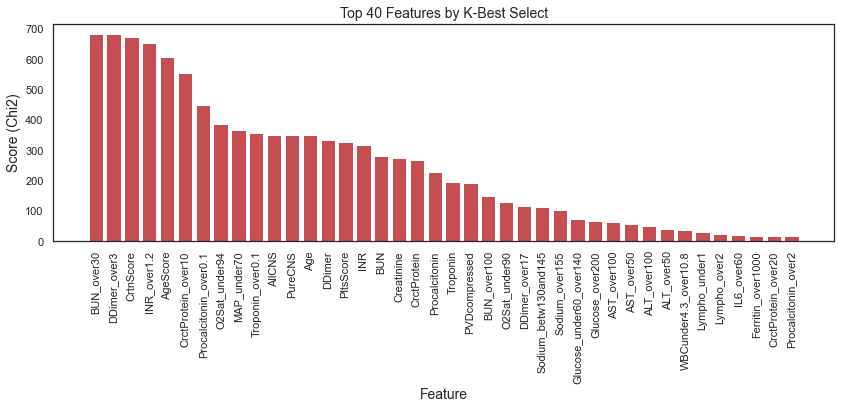

In [473]:
# Retrieved feature names from column indices and created a dataframe

index=['BUN_over30','DDimer_over3','CrtnScore','INR_over1.2','AgeScore',
                            'CrctProtein_over10','Procalcitonin_over0.1','O2Sat_under94',
                            'MAP_under70','Troponin_over0.1','AllCNS','PureCNS','Age',
                            'DDimer','PltsScore','INR','BUN','Creatinine','CrctProtein',
                            'Procalcitonin','Troponin','PVDcompressed','BUN_over100', 
                            'O2Sat_under90','DDimer_over17','Sodium_betw130and145',
                            'Sodium_over155','Glucose_under60_over140','Glucose_over200',
                            'AST_over100','AST_over50','ALT_over100','ALT_over50',
                            'WBCunder4.3_over10.8','Lympho_under1','Lympho_over2',
                            'IL6_over60','Ferritin_over1000','CrctProtein_over20',
                            'Procalcitonin_over2']

scoresDF = pd.DataFrame(fit.scores_[indices[range(40)]],columns=['Scores'], index=index)
#scoresDF = scoresDF.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
#scoresDF = scoresDF.columns({})
    
# Now plot
fig, ax = plt.subplots(figsize=(14,4))
ax.bar(x=scoresDF.index, height=scoresDF.Scores, color='r', align='center')
plt.title("Top 40 Features by K-Best Select",fontsize=14)
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Score (Chi2)",fontsize=14)

plt.tick_params('x',rotation=90)

plt.show()

The Chi-square values decrease significantly after the first 4 and 6 best features.  There is no clear point at which feature inclusion should stop.

In [474]:
# Top 10 scores by Select K Best
scoresDF.head(10)

,Scores
BUN_over30,683.025123
DDimer_over3,682.693188
CrtnScore,672.929743
INR_over1.2,654.593093
AgeScore,608.788757
CrctProtein_over10,554.569204
Procalcitonin_over0.1,449.087411
O2Sat_under94,388.034035
MAP_under70,366.707235
Troponin_over0.1,357.030492


In [477]:
# Created datasets with the Top 10 features as determined by Select K Best

X_train_top10skb = X_train[['BUN_over30','DDimer_over3','CrtnScore','INR_over1.2','AgeScore',
                            'CrctProtein_over10','Procalcitonin_over0.1','O2Sat_under94',
                            'MAP_under70','Troponin_over0.1']]

X_val_top10skb = X_val[['BUN_over30','DDimer_over3','CrtnScore','INR_over1.2','AgeScore',
                            'CrctProtein_over10','Procalcitonin_over0.1','O2Sat_under94',
                            'MAP_under70','Troponin_over0.1']]

X_test_top10skb = X_test[['BUN_over30','DDimer_over3','CrtnScore','INR_over1.2','AgeScore',
                            'CrctProtein_over10','Procalcitonin_over0.1','O2Sat_under94',
                            'MAP_under70','Troponin_over0.1']]

In [478]:
# Created datasets with the Top 40 features as determined by Select K Best

X_train_top40skb = X_train[['BUN_over30','DDimer_over3','CrtnScore','INR_over1.2','AgeScore',
                            'CrctProtein_over10','Procalcitonin_over0.1','O2Sat_under94',
                            'MAP_under70','Troponin_over0.1','AllCNS','PureCNS','Age',
                            'DDimer','PltsScore','INR','BUN','Creatinine','CrctProtein',
                            'Procalcitonin','Troponin','PVDcompressed','BUN_over100', 
                            'O2Sat_under90','DDimer_over17','Sodium_betw130and145',
                            'Sodium_over155','Glucose_under60_over140','Glucose_over200',
                            'AST_over100','AST_over50','ALT_over100','ALT_over50',
                            'WBCunder4.3_over10.8','Lympho_under1','Lympho_over2',
                            'IL6_over60','Ferritin_over1000','CrctProtein_over20',
                            'Procalcitonin_over2']]

X_val_top40skb = X_val[['BUN_over30','DDimer_over3','CrtnScore','INR_over1.2','AgeScore',
                            'CrctProtein_over10','Procalcitonin_over0.1','O2Sat_under94',
                            'MAP_under70','Troponin_over0.1','AllCNS','PureCNS','Age',
                            'DDimer','PltsScore','INR','BUN','Creatinine','CrctProtein',
                            'Procalcitonin','Troponin','PVDcompressed','BUN_over100', 
                            'O2Sat_under90','DDimer_over17','Sodium_betw130and145',
                            'Sodium_over155','Glucose_under60_over140','Glucose_over200',
                            'AST_over100','AST_over50','ALT_over100','ALT_over50',
                            'WBCunder4.3_over10.8','Lympho_under1','Lympho_over2',
                            'IL6_over60','Ferritin_over1000','CrctProtein_over20',
                            'Procalcitonin_over2']]

X_test_top40skb = X_test[['BUN_over30','DDimer_over3','CrtnScore','INR_over1.2','AgeScore',
                            'CrctProtein_over10','Procalcitonin_over0.1','O2Sat_under94',
                            'MAP_under70','Troponin_over0.1','AllCNS','PureCNS','Age',
                            'DDimer','PltsScore','INR','BUN','Creatinine','CrctProtein',
                            'Procalcitonin','Troponin','PVDcompressed','BUN_over100', 
                            'O2Sat_under90','DDimer_over17','Sodium_betw130and145',
                            'Sodium_over155','Glucose_under60_over140','Glucose_over200',
                            'AST_over100','AST_over50','ALT_over100','ALT_over50',
                            'WBCunder4.3_over10.8','Lympho_under1','Lympho_over2',
                            'IL6_over60','Ferritin_over1000','CrctProtein_over20',
                            'Procalcitonin_over2']]

## 3.4. Modelling 

### 3.4.1. Parameter Searches

In [130]:
%%time
# GridsearchCV to find best hyperparameters for the K-NN model

knn_params = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform','distance'],
    'p': [1,2]
}
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None)
gs = GridSearchCV(estimator=knn, param_grid=knn_params, verbose=1, cv=10, n_jobs=-1)
gs.fit(X_train_pca, y_train)
sorted(gs.cv_results_.keys())

# Print results of gridsearch on K-NN  model
print("Best estimator:", '\t', gs.best_estimator_)
print("Best score:", '\t', '\t', gs.best_score_)
print("Best parameters:", '\t', gs.best_params_)
print("Best scorer:", '\t', '\t', gs.scorer_)
print("No. CV splits:", '\t', '\t', gs.n_splits_)
print("Refit time:", '\t', '\t', gs.refit_time_)
print("Multimetric:", '\t', '\t', gs.multimetric_)
print("Classes:", '\t', '\t', gs.classes_)
print("No. of features:", '\t', gs.n_features_in_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best estimator: 	 KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')
Best score: 	 	 0.577484149061474
Best parameters: 	 {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best scorer: 	 	 <function _passthrough_scorer at 0x7fedf12489d0>
No. CV splits: 	 	 10
Refit time: 	 	 0.006262063980102539
Multimetric: 	 	 False
Classes: 	 	 [1 2 3 4]
No. of features: 	 60
CPU times: user 287 ms, sys: 178 ms, total: 465 ms
Wall time: 5.56 s


In [133]:
%%time
# Find the best hyperparameters for the SVC model with randomsearch 

svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc = SVC(probability=False, tol=0.001, cache_size=200, verbose=False, max_iter=- 1, 
          decision_function_shape='ovr', break_ties=False, random_state=1)
rs = RandomizedSearchCV(estimator=svc, param_distributions=svc_params, n_iter=100, 
                        cv=5, return_train_score=True)
rs.fit(X_train_pca, y_train)

# Print results of randomsearch on SVC model

print("Best estimator:", '\t', rs.best_estimator_)
print("Best score:", '\t', '\t', rs.best_score_)
print("Best parameters:", '\t', rs.best_params_)
print("Best scorer:", '\t', '\t', rs.scorer_)
print("No. CV splits:", '\t', '\t', rs.n_splits_)
print("Refit time:", '\t', '\t', rs.refit_time_)
print("Multimetric:", '\t', '\t', rs.multimetric_)
print("Classes:", '\t', '\t', rs.classes_)
print("No. of features:", '\t', rs.n_features_in_)

Best estimator: 	 SVC(C=100, gamma=0.001, random_state=1)
Best score: 	 	 0.938783576722224
Best parameters: 	 {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}
Best scorer: 	 	 <function _passthrough_scorer at 0x7fedf12489d0>
No. CV splits: 	 	 5
Refit time: 	 	 0.26500511169433594
Multimetric: 	 	 False
Classes: 	 	 [1 2 3 4]
No. of features: 	 60
CPU times: user 2min 18s, sys: 394 ms, total: 2min 18s
Wall time: 2min 18s


In [131]:
%%time
# Find the best hyperparameters for the Gaussian Naive Bayes model with gridsearch

param_grid_gnb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
gnb = GaussianNB() 
gs = GridSearchCV(estimator=gnb, param_grid=param_grid_gnb, verbose=1, cv=10, n_jobs=-1)
gs.fit(X_train_pca, y_train)

# Print results of gridsearch on Gaussian Naive Bayes model

print("Best estimator:", '\t', gs.best_estimator_)
print("Best score:", '\t', '\t', gs.best_score_)
print("Best parameters:", '\t', gs.best_params_)
print("Best scorer:", '\t', '\t', gs.scorer_)
print("No. CV splits:", '\t', '\t', gs.n_splits_)
print("Refit time:", '\t', '\t', gs.refit_time_)
print("Multimetric:", '\t', '\t', gs.multimetric_)
print("Classes:", '\t', '\t', gs.classes_)
print("No. of features:", '\t', gs.n_features_in_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best estimator: 	 GaussianNB(var_smoothing=0.0001519911082952933)
Best score: 	 	 0.623496980176929
Best parameters: 	 {'var_smoothing': 0.0001519911082952933}
Best scorer: 	 	 <function _passthrough_scorer at 0x7fedf12489d0>
No. CV splits: 	 	 10
Refit time: 	 	 0.006529092788696289
Multimetric: 	 	 False
Classes: 	 	 [1 2 3 4]
No. of features: 	 60
CPU times: user 386 ms, sys: 75.8 ms, total: 462 ms
Wall time: 904 ms


In [132]:
%%time
# Find the best hyperparameters for the Bernoulli Naive Bayes model with gridsearch

param_grid_bnb = {
    'alpha': np.logspace(0,-9, num=100)
}
bnb = BernoulliNB(binarize=0.0, fit_prior=True, class_prior=None)
gs = GridSearchCV(estimator=bnb, param_grid=param_grid_bnb, verbose=1, cv=10, n_jobs=-1)
gs.fit(X_train_pca, y_train)

# Print results of gridsearch on Bernoulli Naive Bayes model

print("Best estimator:", '\t', gs.best_estimator_)
print("Best score:", '\t', '\t', gs.best_score_)
print("Best parameters:", '\t', gs.best_params_)
print("Best scorer:", '\t', '\t', gs.scorer_)
print("No. CV splits:", '\t', '\t', gs.n_splits_)
print("Refit time:", '\t', '\t', gs.refit_time_)
print("Multimetric:", '\t', '\t', gs.multimetric_)
print("Classes:", '\t', '\t', gs.classes_)
print("No. of features:", '\t', gs.n_features_in_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best estimator: 	 BernoulliNB(alpha=0.657933224657568)
Best score: 	 	 0.6939002080044107
Best parameters: 	 {'alpha': 0.657933224657568}
Best scorer: 	 	 <function _passthrough_scorer at 0x7fedf12489d0>
No. CV splits: 	 	 10
Refit time: 	 	 0.02631092071533203
Multimetric: 	 	 False
Classes: 	 	 [1 2 3 4]
No. of features: 	 60
CPU times: user 448 ms, sys: 86.1 ms, total: 534 ms
Wall time: 1.09 s


In [134]:
%%time
# Find the best hyperparameters for the Random Forest model with randomsearch

param_grid_rf = {
    'n_estimators': [50,100,200,400],
    'criterion': ['gini','entropy'],
     'max_depth': [4,6,8,10,12],
     'min_samples_split': [2,4,6],
     'min_samples_leaf': [1,2,4],
     'max_features': ['sqrt',4,6,10,12]
}
rforest = RandomForestClassifier() 
rs = RandomizedSearchCV(estimator=rforest, param_distributions=param_grid_rf, n_iter=100, 
                        cv=5, return_train_score=True)
rs.fit(X_train_pca, y_train)

# Print results of randomsearch on Random Forest model

print("Best estimator:", '\t', rs.best_estimator_)
print("Best score:", '\t', '\t', rs.best_score_)
print("Best parameters:", '\t', rs.best_params_)
print("Best scorer:", '\t', '\t', rs.scorer_)
print("No. CV splits:", '\t', '\t', rs.n_splits_)
print("Refit time:", '\t', '\t', rs.refit_time_)
print("Multimetric:", '\t', '\t', rs.multimetric_)
print("Classes:", '\t', '\t', rs.classes_)
print("No. of features:", '\t', rs.n_features_in_)

Best estimator: 	 RandomForestClassifier(criterion='entropy', max_depth=12, max_features=12,
                       min_samples_split=4, n_estimators=200)
Best score: 	 	 0.8085649957784797
Best parameters: 	 {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 12, 'max_depth': 12, 'criterion': 'entropy'}
Best scorer: 	 	 <function _passthrough_scorer at 0x7fedf12489d0>
No. CV splits: 	 	 5
Refit time: 	 	 5.055526971817017
Multimetric: 	 	 False
Classes: 	 	 [1 2 3 4]
No. of features: 	 60
CPU times: user 13min 25s, sys: 2.02 s, total: 13min 27s
Wall time: 13min 28s


In [135]:
%%time
# Find the best hyperparameters for the XGBoost model with Randomsearch

xgb_params = {
    'n_estimators': [100, 200, 400],
    'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
    'min_child_weight': [1, 2],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'max_depth': [4, 6, 8, 10],
    'gamma': [0, 0.001, 0.01],
    'alpha': [0, 0.5, 1],
    'lambda': [1.0, 1.1, 1.2],
    'subsample': [0.5, 0.75, 1.0]
}

xgb = XGBClassifier(random_state=1)
rs = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=100, 
                        cv=5, return_train_score=True)
rs.fit(X_train_pca, y_train)

# Print results of randomsearch on XGBoost model model

print("Best estimator:", '\t', rs.best_estimator_)
print("Best score:", '\t', '\t', rs.best_score_)
print("Best parameters:", '\t', rs.best_params_)
print("Best scorer:", '\t', '\t', rs.scorer_)
print("No. CV splits:", '\t', '\t', rs.n_splits_)
print("Refit time:", '\t', '\t', rs.refit_time_)
print("Multimetric:", '\t', '\t', rs.multimetric_)
print("Classes:", '\t', '\t', rs.classes_)

[18:36:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:38] WARNING: /Users/runner/miniforge3/c

### 3.4.2. Build Models

In [407]:
# Optimal parameters

params_knn = {'n_neighbors': 8, 'p': 1, 'weights':'distance'}
params_gnb = {'var_smoothing': 0.0001519911082952933}
params_bnb = {'alpha': 0.657933224657568}
params_logreg = {'C': 10, 'penalty':'l2', 'solver':'lbfgs', 'max_iter':10000}
params_svc = {'kernel': 'rbf', 'gamma': 0.001, 'C': 100, 'probability':True}
params_rforest = {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 
                  'max_features': 12, 'max_depth': 12, 'criterion': 'entropy'}
params_xgb = {'n_estimators': 400, 'eta': 0.1, 'min_child_weight': 2, 
              'colsample_bytree': 0.5, 'max_depth': 4, 'gamma': 0, 'alpha': 0,
              'lambda': 1.1, 'subsample': 0.75}

In [408]:
# Build models
knn = KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')
gnb = GaussianNB(var_smoothing=0.0001519911082952933)
bnb = BernoulliNB(alpha=0.657933224657568)
logreg = LogisticRegression(C=10, penalty='l2', solver='lbfgs', max_iter=10000, random_state=1)
svc = SVC(kernel='rbf', gamma=0.001, C=100, probability=True, random_state=1)
rforest = RandomForestClassifier(n_estimators=200, min_samples_split=6, min_samples_leaf=1, 
                  max_features=12, max_depth=12, criterion='entropy', random_state=1)
xgb = XGBClassifier(n_estimators=400, eta=0.1, min_child_weight=2, colsample_bytree=0.5, 
                    max_depth=4, gamma=0, alpha=0, reg_lambda=1.1, subsample=0.75, 
                    random_state=1)

classifiers = [('knn', knn), ('gnb', gnb), ('bnb', bnb), ('logreg', logreg), ('svc', svc), 
              ('rforest', rforest),('xgb',xgb)]
sclf1 = StackingClassifier(classifiers = classifiers, meta_classifier = rforest)
sclf2 = StackingClassifier(classifiers = classifiers, meta_classifier = logreg)
sclf3 = StackingClassifier(classifiers = classifiers, meta_classifier = xgb)

In [409]:
# Convert 'target' data to array
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [410]:
## helper function

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return accuracy_score(predictions, y_val)

In [411]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Dataset_1 (X_val_pca)',
                                  'Dataset_2 (X_val_top10rfe)',
                                 'Dataset_3 (X_val_top40rfe)',
                                  'Dataset_4 (X_val_top10skb)',
                                 'Dataset_5 (X_val_top40skb)'], 
                       index=['K-Nearest Neighbours', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression',
                               'SVC', 'Random Forest', 'XGBoost', 'Stacking Classifier 1 (RF)', 'Stacking Classifier 2 (XGB)', 'Stacking Classifier 3 (LR)',
                             'Stacking Classifier 4 (SVC)', 'Stacking Classifier 5 (BNB)', 'Stacking Classifier 6 (KNN)'])

In [412]:
%%time
# K-NN
accuracy1 = train_model(knn, X_train_pca, y_train, X_val_pca)
accuracy2 = train_model(knn, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy3 = train_model(knn, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy4 = train_model(knn, X_train_top10skb, y_train, X_val_top10skb)
accuracy5 = train_model(knn, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['K-Nearest Neighbours'] = {
    'Dataset_1 (X_val_pca)': accuracy1,
    'Dataset_2 (X_val_top10rfe)': accuracy2,
    'Dataset_3 (X_val_top40rfe)': accuracy3,
    'Dataset_4 (X_val_top10skb)': accuracy4,
    'Dataset_5 (X_val_top40skb)': accuracy5}
#results

CPU times: user 1.63 s, sys: 418 ms, total: 2.05 s
Wall time: 618 ms


In [413]:
%%time
# Gaussian Naive Bayes
accuracy6 = train_model(gnb, X_train_pca, y_train, X_val_pca)
accuracy7 = train_model(gnb, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy8 = train_model(gnb, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy9 = train_model(gnb, X_train_top10skb, y_train, X_val_top10skb)
accuracy10 = train_model(gnb, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['Gaussian Naive Bayes'] = {
    'Dataset_1 (X_val_pca)': accuracy6,
    'Dataset_2 (X_val_top10rfe)': accuracy7,
    'Dataset_3 (X_val_top40rfe)': accuracy8,
    'Dataset_4 (X_val_top10skb)': accuracy9,
    'Dataset_5 (X_val_top40skb)': accuracy10}
#results

CPU times: user 21.8 ms, sys: 18.3 ms, total: 40.1 ms
Wall time: 94.6 ms


In [414]:
%%time
# Bernoulli Naive Bayes
accuracy11 = train_model(bnb, X_train_pca, y_train, X_val_pca)
accuracy12 = train_model(bnb, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy13 = train_model(bnb, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy14 = train_model(bnb, X_train_top10skb, y_train, X_val_top10skb)
accuracy15 = train_model(bnb, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['Bernoulli Naive Bayes'] = {
    'Dataset_1 (X_val_pca)': accuracy11,
    'Dataset_2 (X_val_top10rfe)': accuracy12,
    'Dataset_3 (X_val_top40rfe)': accuracy13,
    'Dataset_4 (X_val_top10skb)': accuracy14,
    'Dataset_5 (X_val_top40skb)': accuracy15}
#results

CPU times: user 118 ms, sys: 65.1 ms, total: 184 ms
Wall time: 85.3 ms


In [415]:
%%time
# Logistic Regression
accuracy16 = train_model(logreg, X_train_pca, y_train, X_val_pca)
accuracy17 = train_model(logreg, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy18 = train_model(logreg, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy19 = train_model(logreg, X_train_top10skb, y_train, X_val_top10skb)
accuracy20 = train_model(logreg, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['Logistic Regression'] = {
    'Dataset_1 (X_val_pca)': accuracy16,
    'Dataset_2 (X_val_top10rfe)': accuracy17,
    'Dataset_3 (X_val_top40rfe)': accuracy18,
    'Dataset_4 (X_val_top10skb)': accuracy19,
    'Dataset_5 (X_val_top40skb)': accuracy20}
#results

CPU times: user 3.8 s, sys: 815 ms, total: 4.61 s
Wall time: 723 ms


In [416]:
%%time
# SVC
accuracy21 = train_model(svc, X_train_pca, y_train, X_val_pca)
accuracy22 = train_model(svc, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy23 = train_model(svc, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy24 = train_model(svc, X_train_top10skb, y_train, X_val_top10skb)
accuracy25 = train_model(svc, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['SVC'] = {
    'Dataset_1 (X_val_pca)': accuracy21,
    'Dataset_2 (X_val_top10rfe)': accuracy22,
    'Dataset_3 (X_val_top40rfe)': accuracy23,
    'Dataset_4 (X_val_top10skb)': accuracy24,
    'Dataset_5 (X_val_top40skb)': accuracy25}
#results

CPU times: user 6.13 s, sys: 53.4 ms, total: 6.19 s
Wall time: 6.34 s


In [417]:
%%time
# Random Forest
accuracy26 = train_model(rforest, X_train_pca, y_train, X_val_pca)
accuracy27 = train_model(rforest, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy28 = train_model(rforest, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy29 = train_model(rforest, X_train_top10skb, y_train, X_val_top10skb)
accuracy30 = train_model(rforest, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['Random Forest'] = {
    'Dataset_1 (X_val_pca)': accuracy26,
    'Dataset_2 (X_val_top10rfe)': accuracy27,
    'Dataset_3 (X_val_top40rfe)': accuracy28,
    'Dataset_4 (X_val_top10skb)': accuracy29,
    'Dataset_5 (X_val_top40skb)': accuracy30}
#results

CPU times: user 7.32 s, sys: 50.7 ms, total: 7.37 s
Wall time: 7.42 s


In [418]:
%%time
# XGBoost
accuracy31 = train_model(xgb, X_train_pca, y_train, X_val_pca)
accuracy32 = train_model(xgb, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy33 = train_model(xgb, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy34 = train_model(xgb, X_train_top10skb, y_train, X_val_top10skb)
accuracy35 = train_model(xgb, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['XGBoost'] = {
    'Dataset_1 (X_val_pca)': accuracy31,
    'Dataset_2 (X_val_top10rfe)': accuracy32,
    'Dataset_3 (X_val_top40rfe)': accuracy33,
    'Dataset_4 (X_val_top10skb)': accuracy34,
    'Dataset_5 (X_val_top40skb)': accuracy35}
#results

[19:58:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:49] WARNING: /Users/runner/miniforge3/c

In [419]:
%%time

# Stacking Classifier 1
np.random.seed(0)
sclf1 = StackingClassifier(classifiers = [knn, gnb, bnb, logreg, svc, rforest, xgb], 
                          meta_classifier = rforest)


accuracy46 = train_model(sclf1, X_train_pca, y_train, X_val_pca)
accuracy47 = train_model(sclf1, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy48 = train_model(sclf1, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy49 = train_model(sclf1, X_train_top10skb, y_train, X_val_top10skb)
accuracy50 = train_model(sclf1, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['Stacking Classifier 1 (RF)'] = {
    'Dataset_1 (X_val_pca)': accuracy46,
    'Dataset_2 (X_val_top10rfe)': accuracy47,
    'Dataset_3 (X_val_top40rfe)': accuracy48,
    'Dataset_4 (X_val_top10skb)': accuracy49,
    'Dataset_5 (X_val_top40skb)': accuracy50}
#results

[19:59:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:16] WARNING: /Users/runner/miniforge3/c

In [420]:
%%time

# Stacking Classifier 2
np.random.seed(0)
sclf2 = StackingClassifier(classifiers = [knn, gnb, bnb, logreg, svc, rforest, xgb], 
                          meta_classifier = xgb)


accuracy41 = train_model(sclf2, X_train_pca, y_train, X_val_pca)
accuracy42 = train_model(sclf2, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy43 = train_model(sclf2, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy44 = train_model(sclf2, X_train_top10skb, y_train, X_val_top10skb)
accuracy45 = train_model(sclf2, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['Stacking Classifier 2 (XGB)'] = {
    'Dataset_1 (X_val_pca)': accuracy41,
    'Dataset_2 (X_val_top10rfe)': accuracy42,
    'Dataset_3 (X_val_top40rfe)': accuracy43,
    'Dataset_4 (X_val_top10skb)': accuracy44,
    'Dataset_5 (X_val_top40skb)': accuracy45}
#results

[19:59:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:41] WARNING: /Users/runner/miniforge3/c

In [421]:
%%time

# Stacking Classifier 3
np.random.seed(0)
sclf3 = StackingClassifier(classifiers = [knn, gnb, bnb, logreg, svc, rforest, xgb], 
                          meta_classifier = logreg)


accuracy36 = train_model(sclf3, X_train_pca, y_train, X_val_pca)
accuracy37 = train_model(sclf3, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy38 = train_model(sclf3, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy39 = train_model(sclf3, X_train_top10skb, y_train, X_val_top10skb)
accuracy40 = train_model(sclf3, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['Stacking Classifier 3 (LR)'] = {
    'Dataset_1 (X_val_pca)': accuracy36,
    'Dataset_2 (X_val_top10rfe)': accuracy37,
    'Dataset_3 (X_val_top40rfe)': accuracy38,
    'Dataset_4 (X_val_top10skb)': accuracy39,
    'Dataset_5 (X_val_top40skb)': accuracy40}
#results

[20:00:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:24] WARNING: /Users/runner/miniforge3/c

In [422]:
%%time

# Stacking Classifier 4
np.random.seed(0)
sclf4 = StackingClassifier(classifiers = [knn, gnb, bnb, logreg, svc, rforest, xgb], 
                          meta_classifier = svc)


accuracy51 = train_model(sclf4, X_train_pca, y_train, X_val_pca)
accuracy52 = train_model(sclf4, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy53 = train_model(sclf4, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy54 = train_model(sclf4, X_train_top10skb, y_train, X_val_top10skb)
accuracy55 = train_model(sclf4, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['Stacking Classifier 4 (SVC)'] = {
    'Dataset_1 (X_val_pca)': accuracy51,
    'Dataset_2 (X_val_top10rfe)': accuracy52,
    'Dataset_3 (X_val_top40rfe)': accuracy53,
    'Dataset_4 (X_val_top10skb)': accuracy54,
    'Dataset_5 (X_val_top40skb)': accuracy55}
#results

[20:00:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:56] WARNING: /Users/runner/miniforge3/c

In [423]:
%%time

# Stacking Classifier 5
np.random.seed(0)
sclf5 = StackingClassifier(classifiers = [knn, gnb, bnb, logreg, svc, rforest, xgb], 
                          meta_classifier = bnb)


accuracy56 = train_model(sclf5, X_train_pca, y_train, X_val_pca)
accuracy57 = train_model(sclf5, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy58 = train_model(sclf5, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy59 = train_model(sclf5, X_train_top10skb, y_train, X_val_top10skb)
accuracy60 = train_model(sclf5, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['Stacking Classifier 5 (BNB)'] = {
    'Dataset_1 (X_val_pca)': accuracy56,
    'Dataset_2 (X_val_top10rfe)': accuracy57,
    'Dataset_3 (X_val_top40rfe)': accuracy58,
    'Dataset_4 (X_val_top10skb)': accuracy59,
    'Dataset_5 (X_val_top40skb)': accuracy60}
#results

[20:01:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:29] WARNING: /Users/runner/miniforge3/c

In [424]:
%%time

# Stacking Classifier 6
np.random.seed(0)
sclf6 = StackingClassifier(classifiers = [knn, gnb, bnb, logreg, svc, rforest, xgb], 
                          meta_classifier = knn)


accuracy61 = train_model(sclf6, X_train_pca, y_train, X_val_pca)
accuracy62 = train_model(sclf6, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy63 = train_model(sclf6, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy64 = train_model(sclf6, X_train_top10skb, y_train, X_val_top10skb)
accuracy65 = train_model(sclf6, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['Stacking Classifier 6 (KNN)'] = {
    'Dataset_1 (X_val_pca)': accuracy61,
    'Dataset_2 (X_val_top10rfe)': accuracy62,
    'Dataset_3 (X_val_top40rfe)': accuracy63,
    'Dataset_4 (X_val_top10skb)': accuracy64,
    'Dataset_5 (X_val_top40skb)': accuracy65}
#results

[20:01:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:02:02] WARNING: /Users/runner/miniforge3/c

In [425]:
%%time

# Stacking Classifier 7
np.random.seed(0)
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=1000, tol=0.0001, random_state=1, algorithm='lloyd')
sclf7 = StackingClassifier(classifiers = [knn, gnb, bnb, logreg, svc, rforest, xgb], 
                          meta_classifier = kmeans)


accuracy66 = train_model(sclf6, X_train_pca, y_train, X_val_pca)
accuracy67 = train_model(sclf6, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy68 = train_model(sclf6, X_train_top40rfe, y_train, X_val_top40rfe)
accuracy69 = train_model(sclf6, X_train_top10skb, y_train, X_val_top10skb)
accuracy70 = train_model(sclf6, X_train_top40skb, y_train, X_val_top40skb)

# Update dataframe
results.loc['Stacking Classifier 7 (KMeans)'] = {
    'Dataset_1 (X_val_pca)': accuracy66,
    'Dataset_2 (X_val_top10rfe)': accuracy67,
    'Dataset_3 (X_val_top40rfe)': accuracy68,
    'Dataset_4 (X_val_top10skb)': accuracy69,
    'Dataset_5 (X_val_top40skb)': accuracy70}
results

[20:02:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:02:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:02:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:02:33] WARNING: /Users/runner/miniforge3/c

,Dataset_1 (X_val_pca),Dataset_2 (X_val_top10rfe),Dataset_3 (X_val_top40rfe),Dataset_4 (X_val_top10skb),Dataset_5 (X_val_top40skb)
K-Nearest Neighbours,0.610403,0.92569,0.820594,0.795117,0.798301
Gaussian Naive Bayes,0.632696,0.767516,0.686837,0.695329,0.606157
Bernoulli Naive Bayes,0.692144,0.800425,0.767516,0.729299,0.719745
Logistic Regression,0.942675,0.955414,0.947983,0.825902,0.944798
SVC,0.941614,0.943737,0.94586,0.819533,0.943737
Random Forest,0.799363,0.912951,0.882166,0.799363,0.869427
XGBoost,0.842887,0.951168,0.917197,0.805732,0.915074
Stacking Classifier 1 (RF),0.798301,0.933121,0.825902,0.79724,0.800425
Stacking Classifier 2 (XGB),0.854565,0.934183,0.867304,0.79724,0.821656
Stacking Classifier 3 (LR),0.840764,0.937367,0.888535,0.792994,0.87155


The best performing models are Logistic Regression and XGBoost on the Top10rfe dataset, followed closely by SVC.  The Logistic Regression model performed well on all 5 treatments of the dataset except for the Top10skb treatment, which was the least predictive of all treatments of the dataset. We conclude from this that the Recursive Feature Elimination algorithm outperforms the Select K Best algorithm for selection of the most predictive features (at least on this dataset).  The three best-performing models (LogReg, XGBoost and SVC) will be tuned further on the X_train_top10rfe treatment of the dataset, as the models were tuned on the X_train_pca treatment for this initial round of model selection.    

## 3.5. Fine-tuning of best performing models on the best performing dataset treatment

In [180]:
%%time
# Find the best hyperparameters for the Logistic Regression model with gridsearch

lr_params = {'penalty':['l2'], 'C':[1,10,100], 'solver':['liblinear','lbfgs']}

logreg = LogisticRegression(tol=0.0001, random_state=1, max_iter=10000)

gs = GridSearchCV(estimator=logreg, param_grid=lr_params)

gs.fit(X_train_top10rfe, y_train)
print("Best estimator:", '\t', gs.best_estimator_)
print("Best score:", '\t', '\t', gs.best_score_)
print("Best parameters:", '\t', gs.best_params_)
print("Best scorer:", '\t', '\t', gs.scorer_)
print("No. CV splits:", '\t', '\t', gs.n_splits_)
print("Refit time:", '\t', '\t', gs.refit_time_)
print("Multimetric:", '\t', '\t', gs.multimetric_)
print("Classes:", '\t', '\t', gs.classes_)
print("No. of features:", '\t', gs.n_features_in_)

Best estimator: 	 LogisticRegression(C=100, max_iter=10000, random_state=1)
Best score: 	 	 0.9525813815316301
Best parameters: 	 {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best scorer: 	 	 <function _passthrough_scorer at 0x7fedf12489d0>
No. CV splits: 	 	 5
Refit time: 	 	 0.06653118133544922
Multimetric: 	 	 False
Classes: 	 	 [1 2 3 4]
No. of features: 	 10
CPU times: user 7.23 s, sys: 1.46 s, total: 8.69 s
Wall time: 1.21 s


In [181]:
%%time
# Find the best hyperparameters for the XGBoost model with Randomsearch

xgb_params = {
    'n_estimators': [100, 200, 400],
    'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
    'min_child_weight': [1, 2],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'max_depth': [4, 6, 8, 10],
    'gamma': [0, 0.001, 0.01],
    'alpha': [0, 0.5, 1],
    'lambda': [1.0, 1.1, 1.2],
    'subsample': [0.5, 0.75, 1.0]
}

xgb = XGBClassifier(random_state=1)
rs = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=100, 
                        cv=5, return_train_score=True)
rs.fit(X_train_top10rfe, y_train)

# Print results of randomsearch on XGBoost model model

print("Best estimator:", '\t', rs.best_estimator_)
print("Best score:", '\t', '\t', rs.best_score_)
print("Best parameters:", '\t', rs.best_params_)
print("Best scorer:", '\t', '\t', rs.scorer_)
print("No. CV splits:", '\t', '\t', rs.n_splits_)
print("Refit time:", '\t', '\t', rs.refit_time_)
print("Multimetric:", '\t', '\t', rs.multimetric_)
print("Classes:", '\t', '\t', rs.classes_)

[20:27:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:21] WARNING: /Users/runner/miniforge3/c

In [182]:
%%time
# Find the best hyperparameters for the SVC model with gridsearch 

svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001],
    'kernel': ['linear','rbf']
}

svc = SVC(probability=False, tol=0.001, cache_size=200, verbose=False, max_iter=- 1, 
          decision_function_shape='ovr', break_ties=False, random_state=1)
gs = GridSearchCV(estimator=svc, param_grid=svc_params)

gs.fit(X_train_top10rfe, y_train)

# Print results of gridsearch on SVC model

print("Best estimator:", '\t', gs.best_estimator_)
print("Best score:", '\t', '\t', gs.best_score_)
print("Best parameters:", '\t', gs.best_params_)
print("Best scorer:", '\t', '\t', gs.scorer_)
print("No. CV splits:", '\t', '\t', gs.n_splits_)
print("Refit time:", '\t', '\t', gs.refit_time_)
print("Multimetric:", '\t', '\t', gs.multimetric_)
print("Classes:", '\t', '\t', gs.classes_)
print("No. of features:", '\t', gs.n_features_in_)

Best estimator: 	 SVC(C=100, gamma=0.001, kernel='linear', random_state=1)
Best score: 	 	 0.9547040245160886
Best parameters: 	 {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Best scorer: 	 	 <function _passthrough_scorer at 0x7fedf12489d0>
No. CV splits: 	 	 5
Refit time: 	 	 0.08838605880737305
Multimetric: 	 	 False
Classes: 	 	 [1 2 3 4]
No. of features: 	 10
CPU times: user 4.53 s, sys: 42.6 ms, total: 4.58 s
Wall time: 4.63 s


In [188]:
# Build models
logreg = LogisticRegression(C=100, penalty='l2', solver='lbfgs', max_iter=10000, random_state=1)
svc = SVC(kernel='linear', gamma=0.001, C=100, probability=True, random_state=1)
xgb = XGBClassifier(n_estimators=400, eta=0.1, min_child_weight=2, colsample_bytree=0.5, 
                    max_depth=4, gamma=0, alpha=0, reg_lambda=1.1, subsample=0.75, 
                    random_state=1)

In [189]:
# Keep the results in a dataframe
results_fine = pd.DataFrame(columns = ['Dataset_2 (X_val_top10rfe)'], 
                       index=['Logistic Regression', 'SVC', 'XGBoost'])

In [194]:
%%time
# LogReg, XGBoost, SVC
accuracy71 = train_model(logreg, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy72 = train_model(xgb, X_train_top10rfe, y_train, X_val_top10rfe)
accuracy73 = train_model(svc, X_train_top10rfe, y_train, X_val_top10rfe)

# Update dataframe
results_fine.loc['Logistic Regression'] = {'Dataset_2 (X_val_top10rfe)': accuracy71}
results_fine.loc['SVC'] = {'Dataset_2 (X_val_top10rfe)': accuracy73}
results_fine.loc['XGBoost'] = {'Dataset_2 (X_val_top10rfe)': accuracy72}

results_fine

[20:49:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 10.6 s, sys: 2.06 s, total: 12.6 s
Wall time: 2.27 s


,Dataset_2 (X_val_top10rfe)
Logistic Regression,0.955414
SVC,0.954352
XGBoost,0.951168


## 3.6. Evaluation

In [195]:
# Plot learning curves for LogReg, SVC and XGBoost models on Dataset 2 (Top 10 features selected by RFE)

from textwrap import wrap
from sklearn.model_selection import ShuffleSplit
sns.set_theme(style="white")

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    n_jobs=None,
    train_sizes=[0.1, 0.33, 0.55, 0.78, 1.]):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(2, 3, figsize=(20, 5))

    axes[0].set_title('\n'.join(wrap(title,40)),fontsize=14)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples",fontsize=14)
    axes[0].set_ylabel("Score",fontsize=14)

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.nanmean(train_scores, axis=1)
    train_scores_std = np.nanstd(train_scores, axis=1)
    test_scores_mean = np.nanmean(test_scores, axis=1)
    test_scores_std = np.nanstd(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples", fontsize=14)
    axes[1].set_ylabel("fit_times", fontsize=14)
    axes[1].set_title("Scalability of the model", fontsize=14)

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

/Users/gaylecferguson/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/gaylecferguson/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/gaylecferguson/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/gaylecferguson/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is depr

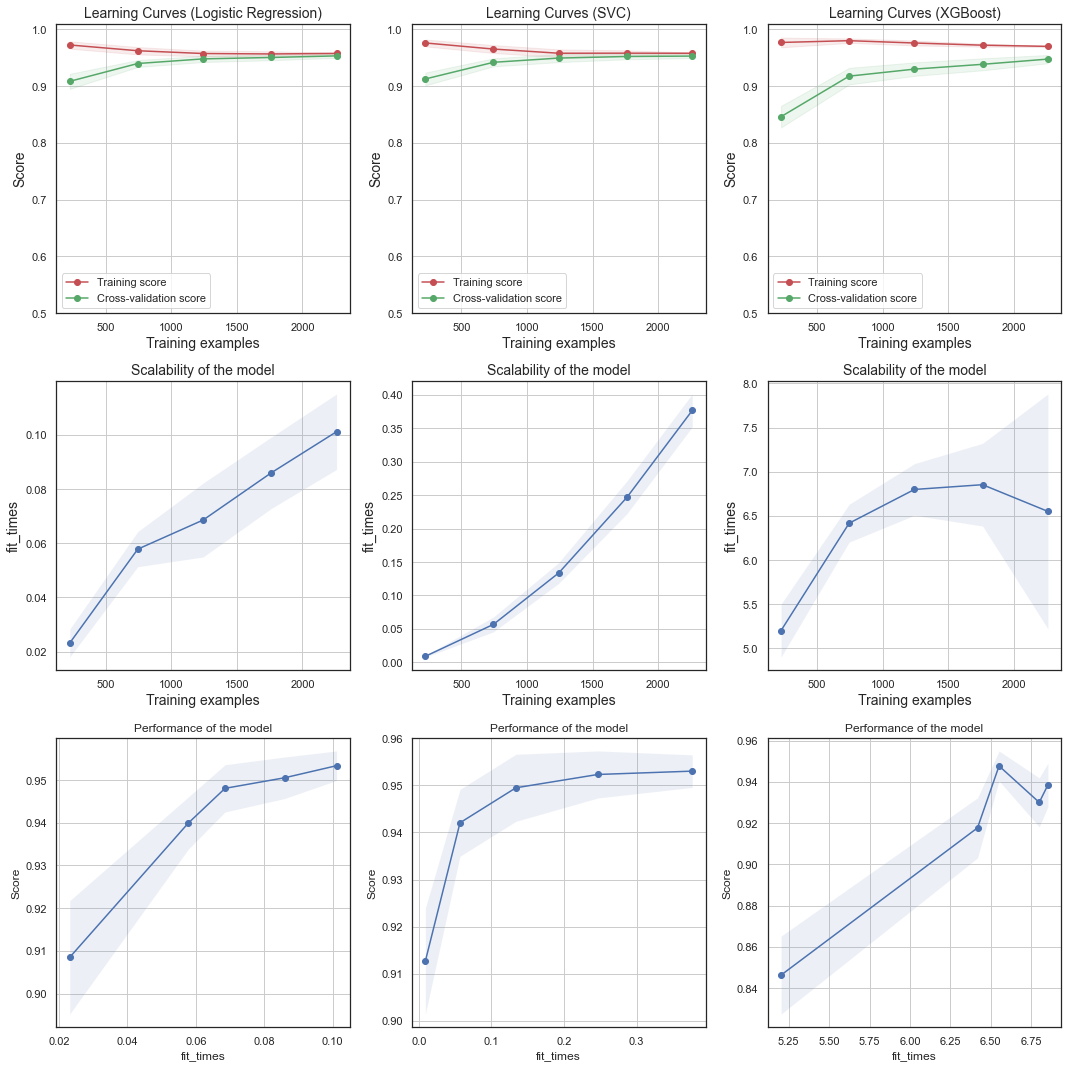

CPU times: user 912 ms, sys: 163 ms, total: 1.07 s
Wall time: 45.9 s


In [196]:
%%time
# Plot learning curves for LogReg, SVC and XGBoost models on Dataset 2 (Top 10 features selected by RFE)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = logreg
plot_learning_curve(estimator, title, X_train_top10rfe, y_train, axes=axes[:, 0], ylim=(0.5, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVC)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = svc
plot_learning_curve(estimator, title, X_train_top10rfe, y_train, axes=axes[:, 1], ylim=(0.5, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (XGBoost)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = xgb
plot_learning_curve(estimator, title, X_train_top10rfe, y_train, axes=axes[:, 2], ylim=(0.5, 1.01), cv=cv, n_jobs=4)

fig.tight_layout()
plt.show()

### 3.6.2. Summary Reports for the Best Models

In [206]:
# Confusion matrix for Logistic Regression Model on Dataset 2 (Top 10 features selected by RFE)

y_preds_logreg = logreg.predict(X_test_top10rfe)
index=['actual_severity class 1', 'actual_severity class 2', 'actual_severity class 3', 'actual_severity class 4']
columns=['predicted_severity class 1','predicted_severity class 2', 'predicted_severity class 3', 'predicted_severity class 4']
cm1 = confusion_matrix(y_test, y_preds_logreg)
df_logreg = pd.DataFrame(cm1, index=index, columns=columns)
df_logreg.style.background_gradient(cmap='GnBu')

,predicted_severity class 1,predicted_severity class 2,predicted_severity class 3,predicted_severity class 4
actual_severity class 1,348,3,1,0
actual_severity class 2,17,391,4,0
actual_severity class 3,0,8,143,2
actual_severity class 4,0,0,2,24


In [200]:
# Classification report for Logistic Regression Model on Dataset 2 (Top 10 features selected by RFE)

index=['severity class 1', 'severity class 2', 'severity class 3', 'severity class 4']
columns=['precision', 'recall', 'f1-score', 'support']
print(classification_report(y_test, y_preds_logreg, target_names=index))

                  precision    recall  f1-score   support

severity class 1       0.95      0.99      0.97       352
severity class 2       0.97      0.95      0.96       412
severity class 3       0.95      0.93      0.94       153
severity class 4       0.92      0.92      0.92        26

        accuracy                           0.96       943
       macro avg       0.95      0.95      0.95       943
    weighted avg       0.96      0.96      0.96       943



In [208]:
# Confusion matrix for SVC Model on Dataset 2 (Top 10 features selected by RFE)

y_preds_svc = svc.predict(X_test_top10rfe)
index=['actual_severity class 1', 'actual_severity class 2', 'actual_severity class 3', 'actual_severity class 4']
columns=['predicted_severity class 1','predicted_severity class 2', 'predicted_severity class 3', 'predicted_severity class 4']
cm2 = confusion_matrix(y_test, y_preds_svc)
df_svc = pd.DataFrame(cm2, index=index, columns=columns)
df_svc.style.background_gradient(cmap='GnBu')

,predicted_severity class 1,predicted_severity class 2,predicted_severity class 3,predicted_severity class 4
actual_severity class 1,342,9,1,0
actual_severity class 2,13,395,4,0
actual_severity class 3,0,8,144,1
actual_severity class 4,0,0,2,24


In [203]:
# Classification report for SVC Model on Dataset 2 (Top 10 features selected by RFE)

index=['severity class 1', 'severity class 2', 'severity class 3', 'severity class 4']
columns=['precision', 'recall', 'f1-score', 'support']
print(classification_report(y_test, y_preds_svc, target_names=index))

                  precision    recall  f1-score   support

severity class 1       0.96      0.97      0.97       352
severity class 2       0.96      0.96      0.96       412
severity class 3       0.95      0.94      0.95       153
severity class 4       0.96      0.92      0.94        26

        accuracy                           0.96       943
       macro avg       0.96      0.95      0.95       943
    weighted avg       0.96      0.96      0.96       943



In [209]:
# Confusion matrix for XGBoost Model on Dataset 2 (Top 10 features selected by RFE)

y_preds_xgb = xgb.predict(X_test_top10rfe)
index=['actual_severity class 1', 'actual_severity class 2', 'actual_severity class 3', 'actual_severity class 4']
columns=['predicted_severity class 1','predicted_severity class 2', 'predicted_severity class 3', 'predicted_severity class 4']
cm3 = confusion_matrix(y_test, y_preds_xgb)
df_xgb = pd.DataFrame(cm3, index=index, columns=columns)
df_xgb.style.background_gradient(cmap='GnBu')

,predicted_severity class 1,predicted_severity class 2,predicted_severity class 3,predicted_severity class 4
actual_severity class 1,348,3,1,0
actual_severity class 2,17,392,3,0
actual_severity class 3,0,12,141,0
actual_severity class 4,0,0,8,18


In [479]:
# Classification report for XGBoost Model on Dataset 2 (Top 10 features selected by RFE)

index=['severity class 1', 'severity class 2', 'severity class 3', 'severity class 4']
columns=['precision', 'recall', 'f1-score', 'support']
print(classification_report(y_test, y_preds_xgb, target_names=index))

                  precision    recall  f1-score   support

severity class 1       0.95      0.99      0.97       352
severity class 2       0.96      0.95      0.96       412
severity class 3       0.92      0.92      0.92       153
severity class 4       1.00      0.69      0.82        26

        accuracy                           0.95       943
       macro avg       0.96      0.89      0.92       943
    weighted avg       0.95      0.95      0.95       943



In [212]:
# Exported X and y data to .csv
X_train_top10rfe.to_csv('X_train_top10rfe.csv')
X_val_top10rfe.to_csv('X_val_top10rfe.csv')
X_test_top10rfe.to_csv('X_test_top10rfe.csv')

y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
y_test = pd.DataFrame(y_test)

y_train.to_csv('y_train.csv')
y_val.to_csv('y_val.csv')
y_test.to_csv('y_test.csv')

## 3.7. Conclusions

In conclusion, I recommend the SVC model for the prediction of COVID-19 illness severity class, as it gives the best results both in terms of accuracy and for recall, i.e. it captures the true degree of illness for the most critical cases, thus has the greatest potential of the three evaluated models for limiting preventable deaths.